Epoch 1
-------------------------------
loss: 2.307670  [   64/60000]
loss: 2.300726  [ 6464/60000]
loss: 2.280332  [12864/60000]
loss: 2.268550  [19264/60000]
loss: 2.248648  [25664/60000]
loss: 2.226388  [32064/60000]
loss: 2.226268  [38464/60000]
loss: 2.198773  [44864/60000]
loss: 2.195782  [51264/60000]
loss: 2.166081  [57664/60000]
Training Error: 
 Accuracy: 26.5%, Avg loss: 2.235904 

Test Error: 
 Accuracy: 44.4%, Avg loss: 2.157735 

Epoch 2
-------------------------------
loss: 2.168555  [   64/60000]
loss: 2.159374  [ 6464/60000]
loss: 2.106023  [12864/60000]
loss: 2.117877  [19264/60000]
loss: 2.061046  [25664/60000]
loss: 2.013389  [32064/60000]
loss: 2.033421  [38464/60000]
loss: 1.963764  [44864/60000]
loss: 1.968708  [51264/60000]
loss: 1.892462  [57664/60000]
Training Error: 
 Accuracy: 52.2%, Avg loss: 2.037480 

Test Error: 
 Accuracy: 55.3%, Avg loss: 1.890949 

Epoch 3
-------------------------------
loss: 1.922698  [   64/60000]
loss: 1.893844  [ 6464/60000]
loss

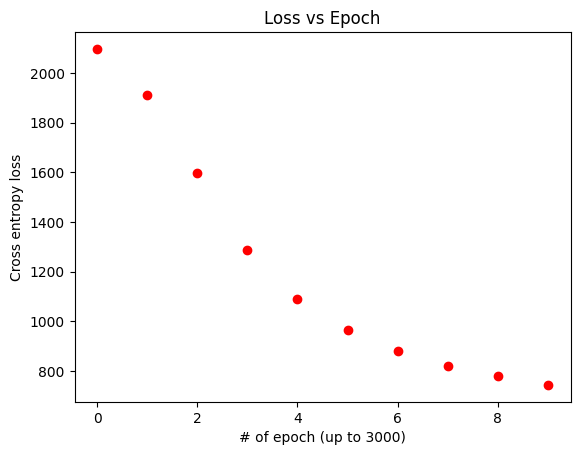

In [6]:
# this code is created by Chanwoo Yoon and Juwon Lee

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# create an instance of the class NeuralNetwork
model = NeuralNetwork().to(device)

# define loss function and optimizer. we are using stochastic gradient decent
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # compute training loss and number of correct prediction
        train_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    temp = train_loss
    train_loss /= num_batches
    correct /= size
    print(f"Training Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")
    return temp

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

def run_epoch(epochs):
  Ltrain_vs_epoch = []
  for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    Ltrain_vs_epoch.append(train(train_dataloader, model, loss_fn, optimizer))
    test(test_dataloader, model, loss_fn)
  print("Done!")
  return Ltrain_vs_epoch

def loss_vs_epoch(Ltrain_vs_epoch):
    colors = ['r', 'b']
    for i in range(len(Ltrain_vs_epoch)):
        plt.plot(i, Ltrain_vs_epoch[i], 'o', color = 'r')
    plt.xlabel('# of epoch (up to 3000)')
    plt.ylabel('Cross entropy loss')
    plt.title('Loss vs Epoch')
    plt.show()

def main():
  epochs = 10
  Ltrain_vs_epoch = run_epoch(epochs)
  loss_vs_epoch(Ltrain_vs_epoch)


main()

